/usr/lib64/python3.4/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM score:  0.9502708025603152
[[-0.00308753  0.01537159 -0.00379372 -0.05784931 -0.07818742 -0.14597351
  -0.11215838  0.19649222 -0.02101016  0.04881649  0.01325347 -0.12504431
  -0.03693867 -0.0091686  -0.00722642 -0.12116481  0.10157233  0.30643957
   0.0598609  -0.00135864 -0.02127752 -0.00722621]]
[-0.00108183]
KNN score: 0.20


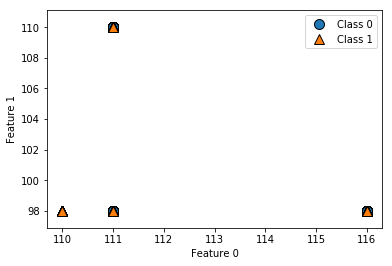

In [57]:
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import mglearn
from mglearn.plot_helpers import discrete_scatter

import matplotlib.pyplot as plt

# Mushroom data, with 22 features and poisonous/not poisonous as the target value.
shrooms = open("mushrooms.csv","r+")
raw_data = shrooms.readlines()

# Converting each character in the data into an ascii value.
inter_data = [raw_data[l].rstrip().split(",") for l in range(1,len(raw_data))]
#print(inter_data[1:5])
X = []
y = []
for sl in inter_data:
    fd = []
    for i in range(len(sl)):
        if i < 1:
            y.append(ord(sl[i]))
        else:
            fd.append(ord(sl[i]))
    X.append(fd)

y = np.array(y)
X = np.array(X)

# Viewing of the data. It doesn't look great, because the data is not continuous.
# We examined columns 17 and 7 because they had high coefficients after training.
# The hope was that they would appear very linearly sepearable, but the result was
# still hard to observe, because the values are discrete.
mglearn.discrete_scatter(X[:, 17], X[:, 7], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

x_train,x_test,y_train,y_test = train_test_split(X,y)

linear_svm = LinearSVC().fit(x_train, y_train)

# Scoring of the model and printing of coefficients/ intercept.
# Performs well, surpisingly.
print("SVM score: ",linear_svm.score(x_test,y_test))
print(str(linear_svm.coef_))
print(str(linear_svm.intercept_))

from sklearn.neighbors import KNeighborsClassifier

# KNN for comparison. We're not sure why the score is so low. We played
# with the number of neighbors, but it was never very optimistic.
knn = KNeighborsClassifier(n_neighbors=1000)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
print("KNN score: {:.2f}".format(np.mean(y_pred != y_test)))